<a href="https://colab.research.google.com/gist/Muyiiwaa/4429ef0c7c387020993326eb2e7bae4d/bytha_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # data manipulation
import numpy as np # numerical computing
import seaborn as sns # high level data visualization
import matplotlib.pyplot as plt # robust data viz
import plotly.express as px # interactive data viz

### Load dataset

In [ ]:
bytha_df = pd.read_csv('Insurance Policies.csv')

In [ ]:
bytha_df.head(7)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income
0,62-2999778,8/9/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,$73759.88,$220436.66
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,$78975.41,$66491.43
2,08-3808219,3/8/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,$30904.01,$56122.70
3,38-0306843,5/10/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,$30257.82,$175182.61
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,$50434.02,$137110.23
5,07-4760971,11/6/1963,Single,Private,Male,1,Yes,PhD,Mercedes-Benz,CLK-Class,Maroon,1999,3,Rural,$71935.14,$212072.46
6,36-8207139,8/27/1999,Single,Private,Male,0,No,High School,Toyota,Matrix,Yellow,2006,0,Rural,$21611.15,$87875.66


### Data Cleaning

1. Remove dollar sign from household column and claim
2. car age
3. age of the claimant
4. drop ID column
5. Inspect and handle null values
6. handle data type inconsistencies

In [ ]:
bytha_df['claim_amt'] = bytha_df['claim_amt'].str.replace('$', '')
bytha_df['household_income'] = bytha_df['household_income'].str.replace('$', '')

C:\Users\hp\AppData\Local\Temp\ipykernel_6932\3716680054.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bytha_df['claim_amt'] = bytha_df['claim_amt'].str.replace('$', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_6932\3716680054.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bytha_df['household_income'] = bytha_df['household_income'].str.replace('$', '')


In [ ]:
# create car age column
bytha_df['car_age'] = 2024 - bytha_df['car_year']

In [ ]:
# create claimant age column

bytha_df['birthdate'] = pd.to_datetime(bytha_df['birthdate'])
bytha_df['age'] = [2024 - x.year for x in bytha_df['birthdate']]

In [ ]:
bytha_df.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,car_age,age
0,62-2999778,1962-08-09,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,14,62
1,70-2426103,1988-04-21,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,20,36
2,08-3808219,1999-03-08,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,31,25
3,38-0306843,1959-05-10,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,24,65
4,47-5163637,1992-01-15,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,18,32


In [ ]:
# drop redundant columns

bytha_df.drop(columns=['ID','birthdate','car_year'], inplace=True)

In [ ]:
#inspect null values
bytha_df.isnull().sum()

marital_status      0
car_use             0
gender              0
kids_driving        0
parent              0
education           0
car_make            0
car_model           0
car_color           0
claim_freq          0
coverage_zone       0
claim_amt           0
household_income    0
car_age             0
age                 0
dtype: int64

In [ ]:
bytha_df.info() # check datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   marital_status    37542 non-null  object
 1   car_use           37542 non-null  object
 2   gender            37542 non-null  object
 3   kids_driving      37542 non-null  int64 
 4   parent            37542 non-null  object
 5   education         37542 non-null  object
 6   car_make          37542 non-null  object
 7   car_model         37542 non-null  object
 8   car_color         37542 non-null  object
 9   claim_freq        37542 non-null  int64 
 10  coverage_zone     37542 non-null  object
 11  claim_amt         37542 non-null  object
 12  household_income  37542 non-null  object
 13  car_age           37542 non-null  int64 
 14  age               37542 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 4.3+ MB


In [ ]:
bytha_df['claim_amt'] = pd.to_numeric(bytha_df['claim_amt'])
bytha_df['household_income'] = pd.to_numeric(bytha_df['household_income'])

### EXPLORATORY DATA ANALYSIS

Text(0.5, 0.98, 'Average claim frequencies and amounts for different demographic groups ')

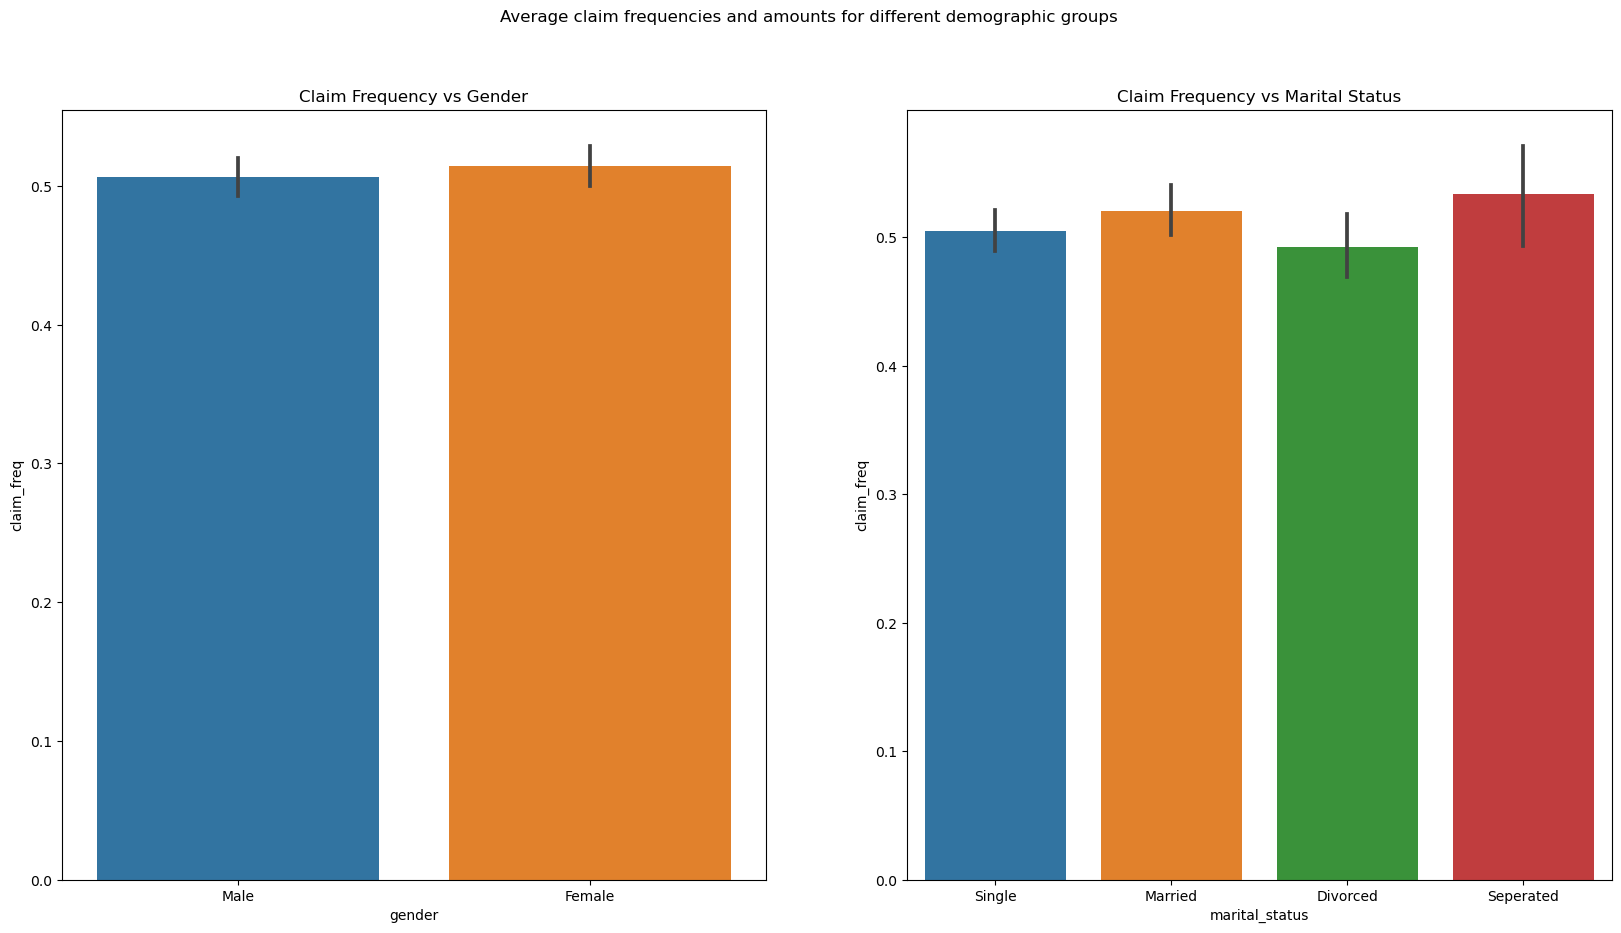

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
sns.barplot(data=bytha_df, x = 'gender', y = 'claim_freq', ax = axes[0])
sns.barplot(data=bytha_df, x = 'marital_status', y = 'claim_freq', ax = axes[1])

axes[0].set_title('Claim Frequency vs Gender')
axes[1].set_title('Claim Frequency vs Marital Status')

plt.suptitle('Average claim frequencies and amounts for different demographic groups ')

In [ ]:
## hypothesis testing


def decision_rule(p_value, variables):
    null = f'At p-value = {p_value}, there is no significant difference in {variables[0]} across {variables[1]}'
    alternative = f'At p-value = {p_value},there is significant difference in {variables[0]} across {variables[1]}'
    if p_value < 0.05:
        return alternative
    else:
        return null

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

#### one way anova test for difference in claim frequency vs gender

In [ ]:
single = bytha_df[bytha_df['marital_status'] == 'Single']['claim_freq'].values
married = bytha_df[bytha_df['marital_status'] == 'Married']['claim_freq'].values
divorced = bytha_df[bytha_df['marital_status'] == 'Divorced']['claim_freq'].values
seperated = bytha_df[bytha_df['marital_status'] == 'Seperated']['claim_freq'].values

f_value, p_value = f_oneway(single,married,divorced,seperated)

print(decision_rule(p_value, ['claim frequency', 'marital status']))

At p-value = 0.1513805108043201, there is no significant difference in claim frequency across marital status


FINDINGS;
The p-value for the ANOVA test is 0.151381. The p-value of 0.151381 is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference in claim frequency across different marital status.Based on the One-Way ANOVA analysis, no evidence to suggest that marital status has a significant impact on claim frequency. Therefore, it is concluded that the null hypothesis is true, and there is no significant difference in claim frequency across different marital status.
Given the findings that marital status does not significantly impact claim frequency, it is recommended that bytha insurance policies and premium rates should not be adjusted or differentiated based solely on the marital status of the policyholders. Instead, the focus should be directed towards other factors that may have a more substantial impact on claim frequency. 


#### Chi-Square test of association in claim frequency vs gender



In [ ]:
bytha_df['claim_cat'] = ['low' if x < 2 else 'medium' if x < 4
                         else 'high' for x in bytha_df['claim_freq']]

In [ ]:
claim_gender = pd.crosstab(bytha_df['gender'], bytha_df['claim_cat'])
chi_stats, p_value, dof, exp = chi2_contingency(claim_gender)

print(decision_rule(p_value, ['gender', 'claim frequency']))

At p-value = 0.7678854051864302, there is no significant difference in gender across claim frequency


FINDINDS;
Based on the chi-square test results, the null hypoyhesis is accepted and the alternative hypothesis is rejected. This suggests that there is no statistically significant association/ difference in gender across claim frequency.The chi-square test of independence shows no statistically significant difference in  gender across claim frequency, with a p-value of 0.7678854051864302(p > 0.05). Given the finding that gender does not significantly impact claim frequency, it is recommended that gender should not be used as a primary factor in determining insurance premiums or risk assessment. Instead, focus on other variables that might provide more insight into claim frequency. Continuous review and analyze other demographic or behavioral factors that could more accurately predict claim frequency and improve risk assessment models.